<a href="https://colab.research.google.com/github/paaivarodrigo/Games-Score/blob/main/Video_Game_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing libraries

#Modeling and matrices
import pandas as pd
import numpy as np

#Graphical Analysis
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings

#Disable warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading Data
df = pd.read_csv('/content/game_sales_data.csv', encoding = 'latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           19600 non-null  int64  
 1   Name           19600 non-null  object 
 2   Platform       19600 non-null  object 
 3   Publisher      19600 non-null  object 
 4   Developer      19598 non-null  object 
 5   Critic_Score   9969 non-null   float64
 6   User_Score     2223 non-null   float64
 7   Total_Shipped  19600 non-null  float64
 8   Year           19600 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


In [14]:
#Checking the first records
df.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


In [5]:
#Checking the dimension
df.shape

(19600, 9)

In [6]:
#Checking for nulls
df.isnull().sum()

Rank                 0
Name                 0
Platform             0
Publisher            0
Developer            2
Critic_Score      9631
User_Score       17377
Total_Shipped        0
Year                 0
dtype: int64

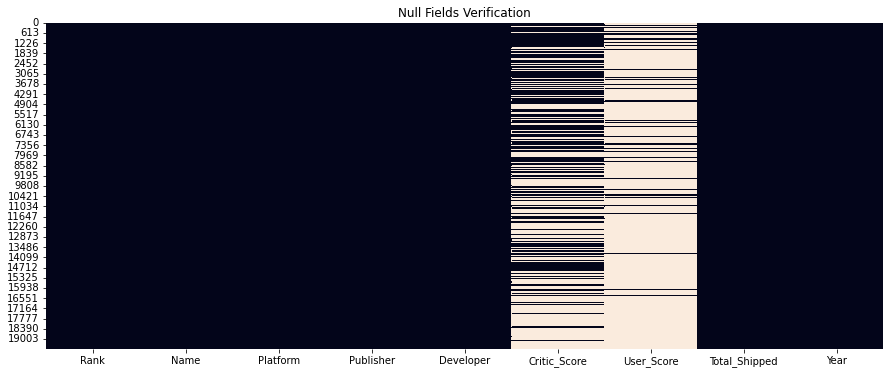

In [7]:
#Graphic View
plt.figure(figsize=(15,6))
plt.title("Null Fields Verification")
sns.heatmap(df.isnull(), cbar = False)

In [8]:
#Since rating from critics and users are important to me, I'm going to remove the null values ​​and apply them directly to the df using the inplace command.
df.dropna(inplace=True)
df.shape

(2208, 9)

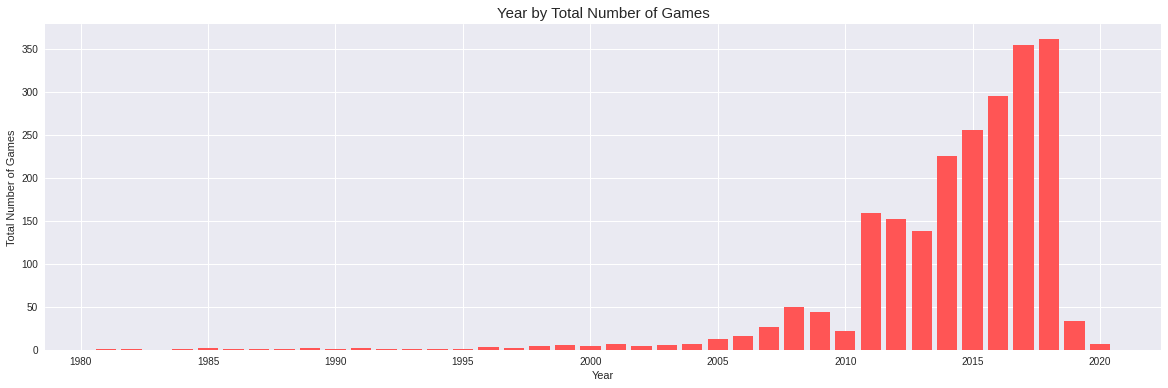

In [17]:
# For each year, count the number of games and plot "Year by total Number of Games"
num_games = {}
games_column = df["Year"].unique()

for year in games_column:
    count = df.loc[df["Year"] == year, "Name"].count()
    num_games[year] = count
    
#Size
plt.figure(figsize=(20,6))

#Chart
plt.bar(num_games.keys(), num_games.values(), color='#ff5555')

#Labels legend
plt.xlabel("Year")
plt.ylabel("Total Number of Games")

#Title
plt.title("Year by Total Number of Games",loc='center', fontsize=15)

plt.show()

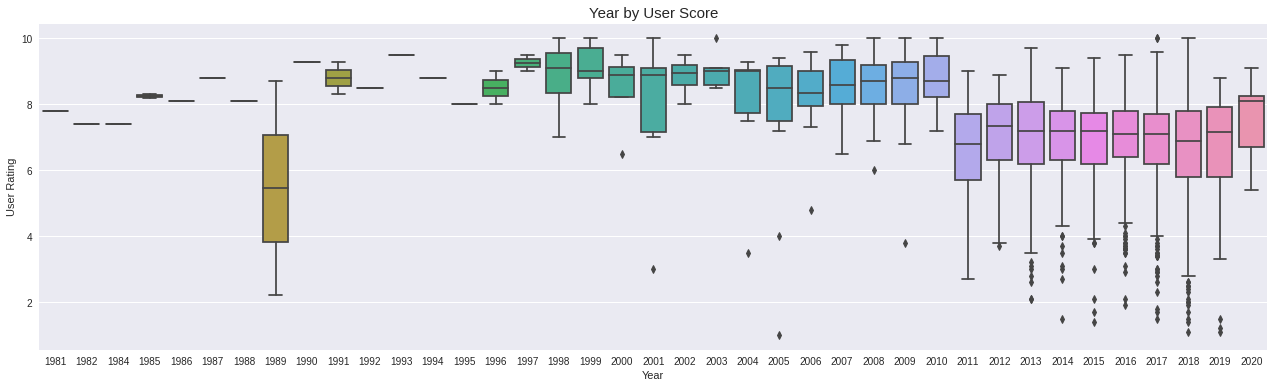

In [20]:
#Analyzing using boxplot

#Size
plt.figure(figsize=(22,6))

#Title
plt.title('Year by User Score',loc='center', fontsize=15)

#Chart
sns.boxplot(data=df, x ='Year', y = 'User_Score')

#Label legend
plt.xlabel("Year")
plt.ylabel("User Rating");

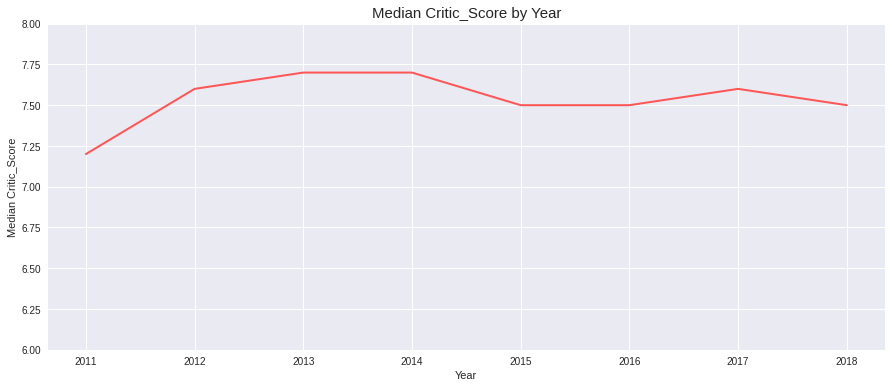

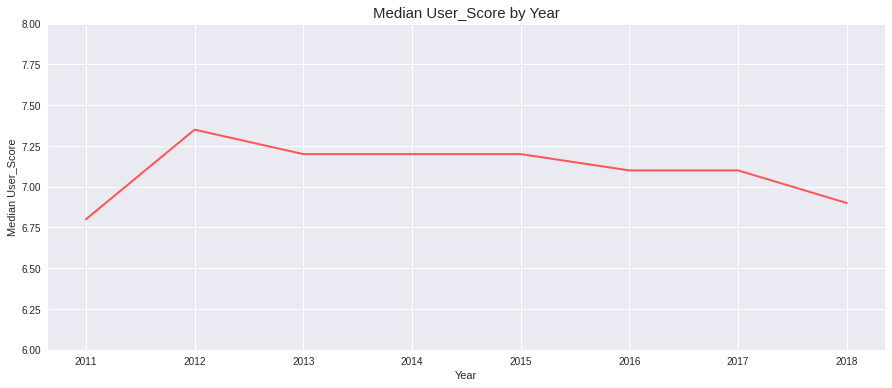

In [43]:
#Median for critic and user
for column_name in ["Critic_Score", "User_Score"]:
    median_ratings_dict = {}
    ratings_column = df["Year"].unique()
    sorted_ratings = sorted(ratings_column, key=lambda e: e, reverse=False)
    
    for year in sorted_ratings:
        if 2011 <= year <= 2018:
            median = df.loc[df["Year"] == year, column_name].median()
            median_ratings_dict[year] = median

    #Size        
    plt.figure(figsize=(15,6))
    #Chart
    plt.plot(list(median_ratings_dict.keys()),list(median_ratings_dict.values()),lw=2, color='#ff5555')
    # Y-axis limit
    plt.ylim(6, 8)

    #Labels legend
    plt.xlabel("Year")
    plt.ylabel("Median " + column_name)

    #Title
    plt.title("Median " + column_name + " by Year", loc='center', fontsize=15)
    plt.show()

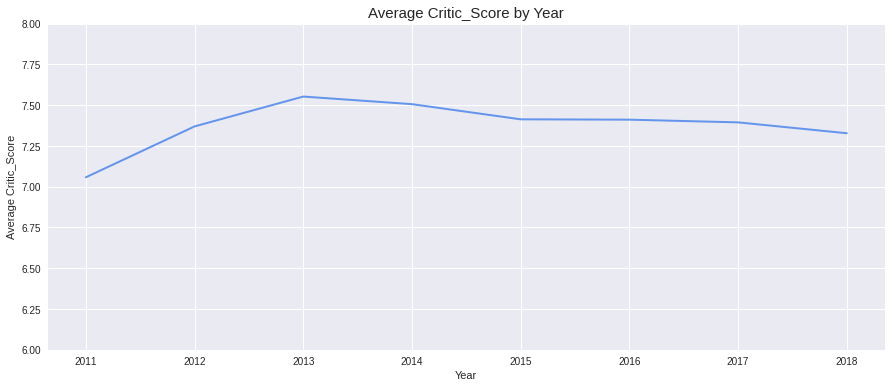

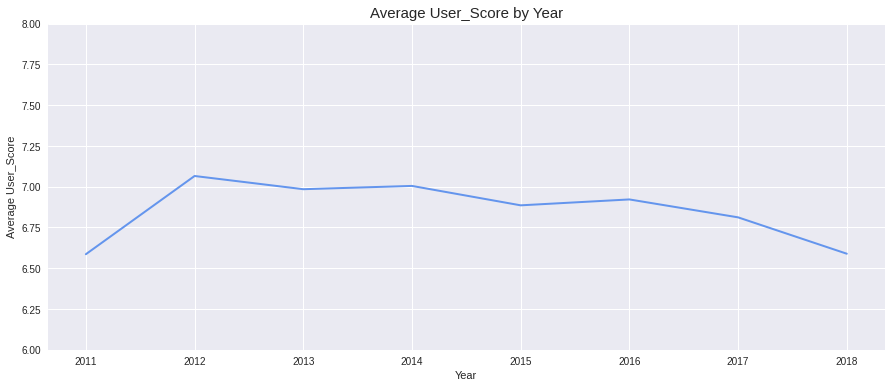

In [39]:
#Average Comparison
for column_name in ["Critic_Score", "User_Score"]:
    average_ratings_dict = {}
    ratings_column = df["Year"].unique()
    sorted_ratings = sorted(ratings_column, key=lambda e: e, reverse=False)
    
    for year in sorted_ratings:
        if 2011 <= year <= 2018:
            sum = df.loc[df["Year"] == year, column_name].sum()
            count = df.loc[df["Year"] == year, column_name].count()
            average = sum / count
            average_ratings_dict[year] = average

    #Size        
    plt.figure(figsize=(15,6))
    #Chart
    plt.plot(list(average_ratings_dict.keys()),list(average_ratings_dict.values()),lw=2, color='#6495ED')
    #Y-axis limit
    plt.ylim(6, 8)

    #Labels legend
    plt.xlabel("Year")
    plt.ylabel("Average " + column_name)

    #Title
    plt.title("Average " + column_name + " by Year",loc='center', fontsize=15)

    plt.show()